In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
# %cd /content/gdrive/My\ Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/google_dist_code_1/google-research
#%cd /content/gdrive/My\ Drive/Accident_Anticipation/Anticipating-Accidents/dataset/videos/frames/
%cd /content/gdrive/My\ Drive/Accident_Anticipation/depth_estimation/google_distance_code/google-research

!pip install tensorflow-graphics

from __future__ import absolute_import, division, print_function

from absl import logging
import os
from depth_from_video_in_the_wild import image_utils
# import image_utils
import cv2
import pickle

import re
import time
import glob
from matplotlib import pyplot as plt

import numpy as np
from PIL import Image

import tensorflow as tf
from depth_from_video_in_the_wild import model_3

# https://github.com/google-research/google-research/tree/master/depth_from_video_in_the_wild

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/google_distance_code/google-research
     |████████████████████████████████| 245kB 2.8MB/s 


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# Find and save intrinsic parameters


In [0]:
## path for intrinsic parameters:
path_odom = '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/google_distance_code/google-research/depth_from_video_in_the_wild/odometry_trajectory_outputs_2/'
batch_str = 'batch_005.npz'
mode = 'training'
vid_num = 2
num1 = (126, 46)

root = '/content/gdrive/My Drive/Accident_Anticipation/Anticipating-Accidents'
# path
train_path = root + '/dataset/features/training/' 
test_path = root +  '/dataset/features/testing/' 
feat_path = (train_path, test_path)

org_bb = np.load(train_path+batch_str) # use org_bb to retrieve bounding boxes, and the correct video ID

odom_complete_paths = image_utils.retrieve_dir_custom(path_odom, org_bb, 'training', num1[0], split_type=1)
odom_np = np.load(odom_complete_paths[vid_num]) # ['rot', 'trans', 'instrinsic_matrix', 'orientation', 'position']

dictionary_path = '/content/gdrive/My Drive/Accident_Anticipation/EXTRACT_PHYSICS_NOTEBOOKS/physical_features/3_intrinsic_parameters/'
dictionary_name = ('training_intrinsics_cropped_1','testing_intrinsics_cropped_1')

str_modes = ['training','testing']
train_num = 126
test_num = 46
n_batch = [train_num, test_num ]
num1 = (126, 46)

ab = 0
feat_type = 'reformatted_det'

for ab in range(2):
    ## Cloud root path:
    root_path0 = '/content/gdrive/My Drive/Accident_Anticipation/Anticipating-Accidents'
    # for ab in range(len(str_modes)):
    str_mode = str_modes[ab]
    root_path = root_path0+'/dataset/features/' +str_mode + '/'
    frame_path = root_path0+'/dataset/videos/frames/'

    cur_path = feat_path[ab]


    # feat_save_path = root_path0+'/preprocessed_features/'+feat_type+'/'+str_mode+'/'

    ## Access given batches
    ## Augment/Amend the feature maps with bounding box, distance, optical flow and odometry
    root_num = len(os.listdir(root_path)) 
    n_batchs = np.arange(1,root_num+1)

    tStart_epoch = time.time()
    root_batch_list = sorted(os.listdir(root_path))

    intrinsics_dict = dict()

    print(root_batch_list)

    for cur_batch in root_batch_list:
      if '127' in cur_batch or '128' in cur_batch:
        print('Passed batch: ' + str(cur_batch))
        
      else:   
        org_bb = np.load(cur_path+cur_batch) # use org_bb to retrieve bounding boxes, and the correct video I
        odom_complete_paths = image_utils.retrieve_dir_custom(path_odom, org_bb, str_modes[ab], num1[ab], split_type=1)

        print(odom_complete_paths)


        for vids in range(len(odom_complete_paths)):
            cur_file_name = re.split('/', odom_complete_paths[vids])[-1][0:-4]
            int_mat = np.load(odom_complete_paths[vids])['instrinsic_matrix']
            med_int = np.median(int_mat, axis = 0)
            cur_deviation = np.std(int_mat, axis = 0)
            intrinsics_dict[cur_file_name[9::]] = med_int
            print(cur_file_name, cur_deviation[0,0], cur_deviation[1,1], cur_deviation[0,-1], cur_deviation[1,-1])

    output = open(dictionary_path+dictionary_name[ab]+'.pkl', 'wb')
    pickle.dump(intrinsics_dict, output)
    output.close()



['batch_001.npz', 'batch_002.npz', 'batch_003.npz', 'batch_004.npz', 'batch_005.npz', 'batch_006.npz', 'batch_007.npz', 'batch_008.npz', 'batch_009.npz', 'batch_010.npz', 'batch_011.npz', 'batch_012.npz', 'batch_013.npz', 'batch_014.npz', 'batch_015.npz', 'batch_016.npz', 'batch_017.npz', 'batch_018.npz', 'batch_019.npz', 'batch_020.npz', 'batch_021.npz', 'batch_022.npz', 'batch_023.npz', 'batch_024.npz', 'batch_025.npz', 'batch_026.npz', 'batch_027.npz', 'batch_028.npz', 'batch_029.npz', 'batch_030.npz', 'batch_031.npz', 'batch_032.npz', 'batch_033.npz', 'batch_034.npz', 'batch_035.npz', 'batch_036.npz', 'batch_037.npz', 'batch_038.npz', 'batch_039.npz', 'batch_040.npz', 'batch_041.npz', 'batch_042.npz', 'batch_043.npz', 'batch_044.npz', 'batch_045.npz', 'batch_046.npz', 'batch_047.npz', 'batch_048.npz', 'batch_049.npz', 'batch_050.npz', 'batch_051.npz', 'batch_052.npz', 'batch_053.npz', 'batch_054.npz', 'batch_055.npz', 'batch_056.npz', 'batch_057.npz', 'batch_058.npz', 'batch_059.np

Function that write intrinsic camera parameters to txt file, so that it can be used in the network.

In [0]:

def writing_intrinsic_matrix(INPUT_DIR, OUTPUT_DIR, intrisic_dict_path,trn_tst_tuple, SEQ_LENGTH=3, STEPSIZE=1):
  ct = 0
  if not OUTPUT_DIR.endswith('/'):
      OUTPUT_DIR = OUTPUT_DIR + '/'

  ## d is training or testing
  iter1 = 0
  for d in glob.glob(INPUT_DIR + '/*/'):
      if iter1 == 0:
        pkl_file = open(intrinsic_dict_path+trn_tst_tuple[0], 'rb')
        intrin_dict = pickle.load(pkl_file)
        pkl_file.close()
      else:
        pkl_file = open(intrinsic_dict_path+trn_tst_tuple[1], 'rb')
        intrin_dict = pickle.load(pkl_file)
        pkl_file.close()
      iter1 += 1
      date = d.split('/')[-2]
      print(date)
      # file_calibration = d + 'calib_cam_to_cam.txt'
      # calib_raw = [get_line(file_calibration, 'P_rect_02'), get_line(file_calibration, 'P_rect_03')]

      ## d2 is the actual folder creating the file sequence
      for d2 in glob.glob(d + '*/'):
          seqname = d2.split('/')[-2]
          print('Processing sequence', seqname)
          # for subfolder in ['image_02/data', 'image_03/data']:
          ct = 1

          # if not os.path.exists(OUTPUT_DIR +'/'+date+'_'+seqname): negative_00001
          if True:
              # os.mkdir(OUTPUT_DIR +'/'+date+'/'+ seqname)
              # print('made dir ' + '/'+ seqname)

              # try:
              int_mat = intrin_dict[seqname]
              calib_representation = str(int_mat[0,0])+', '+str(int_mat[0,1])+', '+str(int_mat[0,2])+', ' \
              +str(int_mat[1,0])+', '+str(int_mat[1,1])+', '+str(int_mat[2,2])+', ' \
              +str(int_mat[2,0])+', '+str(int_mat[2,1])+', '+str(int_mat[2,2])


              # calib_camera = calib_raw[0] if subfolder=='image_02/data' else calib_raw[1]
              folder = d2 
              # print(folder)
              files = glob.glob(folder + '/*.png')
              files = [file for file in files if not 'disp' in file and not 'flip' in file and not 'seg' in file]
              files = sorted(files)
              print(len(files))
              for i in range(SEQ_LENGTH, len(files)+2, STEPSIZE):
                  imgnum = str(ct).zfill(10)
                  # if os.path.exists(OUTPUT_DIR + seqname + '/' + imgnum + '.png'):
                  #     ct+=1
                  #     continue
                  wct = 0

                  for j in range(i-SEQ_LENGTH, i):  # Collect frames for this sample.
                      wct+=1
                      if os.path.exists(OUTPUT_DIR +date +'/'+seqname + '/' + imgnum + '_cam.txt'):
                        os.remove(OUTPUT_DIR +date +'/'+seqname + '/' + imgnum + '_cam.txt')
                        # print('Removed! : ' +OUTPUT_DIR +date +'/'+seqname + '/' + imgnum + '_cam.txt')
                        
                      f = open(OUTPUT_DIR +date +'/'+seqname + '/' + imgnum + '_cam.txt', 'w') 
                      f.write(calib_representation)
                      f.close()

                      # f = open(OUTPUT_DIR +date +'/'+seqname + '/' + imgnum + '_cam.txt', "r")
                      # print(f.read())
                      # f.close()
                      ct+=1
              # except:
              #   print('Skipped!')
              #   print(seqname)




In [2]:
# OUTPUT_DIR = '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/'
# intrinsic_dict_path = '/content/gdrive/My Drive/Accident_Anticipation/EXTRACT_PHYSICS_NOTEBOOKS/physical_features/3_intrinsic_parameters/'

# trn_tst_tuple = ('training_intrinsics_cropped_1.pkl','testing_intrinsics_cropped_1.pkl')


# writing_intrinsic_matrix(OUTPUT_DIR,OUTPUT_DIR, intrinsic_dict_path,trn_tst_tuple)
print(os.listdir('../odometry_model/checkpoint/model-483930'))

FileNotFoundError: ignored

# Run Odometry

In [4]:
!python -m depth_from_video_in_the_wild.trajectory_inference_1 \
!  --checkpoint_path=../odometry_model/checkpoint/model-483930 \
!  --odometry_test_set_dir=../accident_data/reformatting_imgs/reordered_final_outputs_2/training \
!  --output_dir=depth_from_video_in_the_wild/odometry_trajectory_outputs_2 \
!  --alsologtostderr

#'/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2'

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

I0209 07:09:53.107264 139698016253824 model_3.py:84] batch_size: 1
I0209 07:09:53.107517 139698016253824 model_3.py:84] beta1: 0.9
I0209 07:09:53.107611 139698016253824 model_3.py:84] boxify: True
I0209 07:09:53.107662 139698016253824 model_3.py:84] data_dir: None
I0209 07:09:53.107708 139698016253824 model_3.py:84] depth_consistency_loss_weight: 0.01
I0209 07:09:53.107753 139698016253824 model_3.py:84] f

In [6]:
!python -m depth_from_video_in_the_wild.trajectory_inference_1 \
!  --checkpoint_path=../odometry_model/checkpoint/model-483930 \
!  --odometry_test_set_dir=../accident_data/reformatting_imgs/reordered_final_outputs_2/testing \
!  --output_dir=depth_from_video_in_the_wild/odometry_trajectory_outputs_2 \
!  --alsologtostderr
# !  --nolearn_intrinsics

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

I0209 20:55:37.080320 140471876401024 model_3.py:84] batch_size: 1
I0209 20:55:37.080622 140471876401024 model_3.py:84] beta1: 0.9
I0209 20:55:37.080711 140471876401024 model_3.py:84] boxify: True
I0209 20:55:37.080779 140471876401024 model_3.py:84] data_dir: None
I0209 20:55:37.080845 140471876401024 model_3.py:84] depth_consistency_loss_weight: 0.01
I0209 20:55:37.080914 140471876401024 model_3.py:84] f

In [0]:
print(os.listdir('../'))

['kitti_learned_intrinsics', 'depth_model', 'odometry_model', 'google-research', 'accident_data', 'Arul_distance_map_processing.ipynb', 'cityscapes_kitti_learned_intrinsics', 'train.txt', 'serene_google_distance_code.ipynb', 'og_serene_google_distance_code.ipynb', 'replicate_original_depth_from_wild.ipynb']


In [0]:
# fix path
odometry_test_set_dir = '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/training'
output_dir = 'depth_from_video_in_the_wild/odometry_trajectory_outputs/training'
src_folders = sorted(os.listdir(odometry_test_set_dir))
dest_folders = sorted(os.listdir(output_dir))
dest_folders1 = [dest_folders[i][9:-4] for i in range(len(dest_folders))]
ODOMETRY_SETS = sorted(list(set(src_folders) - set(dest_folders1)))

print(ODOMETRY_SETS)
print(src_folders)
print(dest_folders)

['negative_000742', 'negative_000743', 'negative_000744', 'negative_000745', 'negative_000746', 'negative_000747', 'negative_000748', 'negative_000749', 'negative_000750', 'negative_000751', 'negative_000752', 'negative_000753', 'negative_000754', 'negative_000755', 'negative_000756', 'negative_000757', 'negative_000758', 'negative_000759', 'negative_000760', 'negative_000761', 'negative_000762', 'negative_000763', 'negative_000764', 'negative_000765', 'negative_000766', 'negative_000767', 'negative_000768', 'negative_000769', 'negative_000770', 'negative_000771', 'negative_000772', 'negative_000773', 'negative_000774', 'negative_000775', 'negative_000776', 'negative_000777', 'negative_000778', 'negative_000779', 'negative_000780', 'negative_000781', 'negative_000782', 'negative_000783', 'negative_000784', 'negative_000785', 'negative_000786', 'negative_000787', 'negative_000788', 'negative_000789', 'negative_000790', 'negative_000791', 'negative_000792', 'negative_000793', 'negative_0

In [0]:


print(dest_folders1)

['negative_000001', 'negative_000002', 'negative_000003', 'negative_000004', 'negative_000005', 'negative_000006', 'negative_000007', 'negative_000008', 'negative_000009', 'negative_000010', 'negative_000011', 'negative_000012', 'negative_000013', 'negative_000014', 'negative_000015', 'negative_000016', 'negative_000017', 'negative_000018', 'negative_000019', 'negative_000020', 'negative_000021', 'negative_000022', 'negative_000023', 'negative_000024', 'negative_000025', 'negative_000026', 'negative_000027', 'negative_000028', 'negative_000029', 'negative_000030', 'negative_000031', 'negative_000032', 'negative_000033', 'negative_000034', 'negative_000035', 'negative_000036', 'negative_000037', 'negative_000038', 'negative_000039', 'negative_000040', 'negative_000041', 'negative_000042', 'negative_000043', 'negative_000044', 'negative_000045', 'negative_000046', 'negative_000047', 'negative_000048', 'negative_000049', 'negative_000050', 'negative_000051', 'negative_000052', 'negative_0

In [0]:
!pwd
print(sorted(os.listdir('../../accident_data/reformatting_imgs/reordered_final_outputs_2/training')))
#'DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2'

/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/google_dist_code_1/google-research
['negative_000001', 'negative_000002', 'negative_000003', 'negative_000004', 'negative_000005', 'negative_000006', 'negative_000007', 'negative_000008', 'negative_000009', 'negative_000010', 'negative_000011', 'negative_000012', 'negative_000013', 'negative_000014', 'negative_000015', 'negative_000016', 'negative_000017', 'negative_000018', 'negative_000019', 'negative_000020', 'negative_000021', 'negative_000022', 'negative_000023', 'negative_000024', 'negative_000025', 'negative_000026', 'negative_000027', 'negative_000028', 'negative_000029', 'negative_000030', 'negative_000031', 'negative_000032', 'negative_000033', 'negative_000034', 'negative_000035', 'negative_000036', 'negative_000037', 'negative_000038', 'negative_000039', 'negative_000040', 'negative_000041', 'negative_000042', 'negative_000043', 'negative_000044', 'negative_000045', 'negative_000

In [0]:
## find npy files, see if they are the correct shape
print(os.listdir('./depth_from_video_in_the_wild/odometry_trajectory_outputs'))

cur_path = 'depth_from_video_in_the_wild/odometry_trajectory_outputs/odometry_09-image_2.npz'

odometry_outputs = np.load(cur_path)

['odometry_09-image_2.txt', 'odometry_10-image_2.txt', 'odometry_09-image_2.npz', 'odometry_10-image_2.npz']


In [0]:
## find the destination path
!pwd
print(os.listdir('./'))
dest_path_root = '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2'


print(os.listdir(dest_path_reform_imgs))
## find path to cropped images

/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/google_dist_code_1/google-research
['.gitignore', '.travis.yml', 'CONTRIBUTING.md', 'LICENSE', 'README.md', '__init__.py', 'compile_protos.sh', 'depth_from_video_in_the_wild', 'image_utils.py', '__pycache__', 'depth_checkpoints', 'lib', 'third_party']
['training', 'testing']


In [0]:
temp1 = ['One', 'Two', 'Three', 'Four']
temp2 = ['One', 'Two']

list(set(temp1) - set(temp2))
print(set(temp1))
print(set(['One', 'Two', 'One']))

print(set(temp2) - set(temp1) )

{'Four', 'Three', 'Two', 'One'}
{'Two', 'One'}
set()


In [0]:
from glob import glob
train_list = sorted(glob(dest_path_root+'/'+'training'+'/*'))
test_list = sorted(glob(dest_path_root+'/'+'testing'+'/*'))

print(sorted(glob(dest_path_root+'/'+'training'+'/*')))
# print(dest)

['/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/training/negative_000001', '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/training/negative_000002', '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/training/negative_000003', '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/training/negative_000004', '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/accident_data/reformatting_imgs/reordered_final_outputs_2/training/negative_000005', '/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distan

['rot', 'trans', 'instrinsic_matrix', 'orientation', 'position']
(98, 3, 3)
(98, 3)
(98, 3, 3)
(98, 3, 3)
(98, 3)


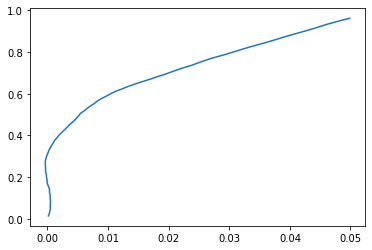

In [0]:
print(list(odometry_outputs.keys()))
print(odometry_outputs['rot'].shape)
print(odometry_outputs['trans'].shape)
print(odometry_outputs['instrinsic_matrix'].shape)
print(odometry_outputs['orientation'].shape)
print(odometry_outputs['position'].shape)
positions = odometry_outputs['position']
plt.plot(positions[:,0],positions[:,2])

In [0]:
def load_images(image_files):
    from skimage.transform import resize
    loaded_images = []
    iter1 = 0

    for file in image_files:
        crop_middle, crop_upper, crop_lower, img_shape = selective_cropping(file)

        if iter1 == 0:
          img_stack_middle, img_stack_upper, img_stack_lower = crop_middle, crop_upper, crop_lower
        elif img_stack_upper.any() != None:
          img_stack_middle, img_stack_upper, img_stack_lower = np.concatenate((img_stack_middle, crop_middle), axis = 0), np.concatenate((img_stack_upper, crop_upper), axis = 0), np.concatenate((img_stack_lower, crop_lower), axis = 0),
        else:
          img_stack_middle = np.concatenate((img_stack_middle, crop_middle), axis = 0)
        iter1+=1


    return img_stack_middle, img_stack_upper, img_stack_lower, img_shape


def crop(img):
    # Perform center cropping, preserving 50% vertically.
    middle_perc = 0.50
    left = 1-middle_perc
    half = left/2
    a = img[int(img.shape[0]*(half)):int(img.shape[0]*(1-half)), :]

    # Resize to match target height while preserving aspect ratio.
    wdt = int((128*a.shape[1]/a.shape[0]))
    x_scaling = float(wdt)/a.shape[1]
    y_scaling = 128.0/a.shape[0]
    b = cv2.resize(a, (wdt, 128))

    # Perform center cropping horizontally.
    remain = b.shape[1] - 416
    # cx /= (b.shape[1]/416)
    c = b[:, int(remain/2):b.shape[1]-int(remain/2)]

    return c

def crop_upper(img):
    # cropping the top
    middle_perc = 0.50
    left = 1-middle_perc
    half = left/2
    a = img[0:int(img.shape[0]*(middle_perc)), :]
    wdt = int((128*a.shape[1]/a.shape[0]))
    x_scaling = float(wdt)/a.shape[1]
    y_scaling = 128.0/a.shape[0]
    b = cv2.resize(a, (wdt, 128))
    remain = b.shape[1] - 416
    c = b[:, int(remain/2):b.shape[1]-int(remain/2)]
    return c

def crop_lower(img):
    # cropping the top
    middle_perc = 0.50
    left = 1-middle_perc
    half = left/2
    a = img[(-1)*int(img.shape[0]*(middle_perc))::, :]
    wdt = int((128*a.shape[1]/a.shape[0]))
    x_scaling = float(wdt)/a.shape[1]
    y_scaling = 128.0/a.shape[0]
    b = cv2.resize(a, (wdt, 128))
    remain = b.shape[1] - 416
    c = b[:, int(remain/2):b.shape[1]-int(remain/2)]
    return c

# random functions
def obtain_keys(lis):
    key_ls = list()
    for k in lis:
        integer = re.split('([0-9]+)', k)[1]
        key_ls.append(int(integer))
    return(key_ls)
  
def obtain_keys1(lis):
    key_ls = list()
    for k in lis:
        integer = re.split('([0-9]+)', k)[3]
        key_ls.append(int(integer))
    return(key_ls)
  
def h(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)
  
def sort_dir(lis):
    key_ls = h(obtain_keys(lis))
    return [lis[i] for i in key_ls]

## Perform cropping and resizing, place into network
def selective_cropping(img):
  x = np.clip(np.asarray(Image.open( img ), dtype=float) / 255, 0, 1)
  cropped = np.expand_dims(crop(x), axis = 0)
  cropped1 = None
  cropped2 = None
  if (np.abs(cropped.shape[1]-128)>30) and (np.abs(cropped.shape[2]-416)>30):
    x_1 = np.zeros((720,1280, 3))
    x_1[0:x.shape[0], 0:x.shape[1], :] = x  
    cropped = np.expand_dims(crop(x_1), axis = 0)
    print("Cropping pattern did not fit, resized.")
    print(img_folders)
  else:
    cropped1 = np.expand_dims(crop_upper(x), axis = 0)[:,:,0:-1,:]
    cropped2 = np.expand_dims(crop_lower(x), axis = 0)[:,:,0:-1,:]
  cropped = cropped[:,:,0:-1,:]
  img_shape = x.shape
  return cropped, cropped1, cropped2, img_shape

In [0]:
# tf.reset_default_graph() 
# train_model = model.Model(data_dir='depth_from_video_in_the_wild/data_example',is_training=True)
# saver  = train_model.saver

# # saver = tf.train.Saver()
sess = tf.Session()
# saver.restore(sess, save_path = 'depth_from_video_in_the_wild/depth_cp_2/model-1000977')

depth_model = model.Model(is_training=False, batch_size = 100)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Scale of 0 disables regularizer.


In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
print(image_stack_middle.shape)
start_time = time.time()
output = depth_model.inference_depth(image_stack_middle, sess)
print(time.time() - start_time)

plt.imshow(output[0,:,:,0])

NameError: ignored

In [0]:

image_files = list()
image_files.append('./depth_from_video_in_the_wild/data_example/erfurt_93/0000000002.png')
# output_img = load_images(image_files)
# output_img[0].shape
# new_output = output_img[0][:,:,0:(416*2),:]
# new_output = np.concatenate((new_output,new_output,new_output,new_output),axis=0)
# image_tens = tf.convert_to_tensor(output_img)
# print(new_output.shape)

In [0]:
new_output = output[0][:,:,0:(416*2),:]
new_output = np.concatenate((new_output,new_output,new_output,new_output),axis=0)
print(new_output.shape)

NameError: ignored

In [0]:
!dir
# checkpoint path
# odometry test set dir
# output_dir

compile_protos.sh  depth_from_video_in_the_wild  lib	      README.md
CONTRIBUTING.md    image_utils.py		 LICENSE      third_party
depth_checkpoints  __init__.py			 __pycache__


In [0]:
print(os.listdir('./depth_from_video_in_the_wild/odometry_weights/odometry_learned_intrinsics/checkpoint/'))

## Getting pose from rotation matrix
## http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MARBLE/high/high.htm

# http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MARBLE/high/pose/express.htm

['model-413174.index', 'model-413174.meta', 'model-413174.data-00000-of-00001']


In [0]:
!pwd

/content/gdrive/My Drive/Accident_Anticipation/depth_estimation/DenseDepth/google_distance_code/google_dist_code_1/google-research


In [0]:
print(os.listdir('./depth_from_video_in_the_wild'))

['README.md', '__init__.py', 'consistency_losses.py', 'data_example', 'depth_prediction_net.py', 'model.py', 'motion_prediction_net.py', 'randomized_layer_normalization.py', 'reader.py', 'requirements.txt', 'run.sh', 'transform_depth_map.py', 'transform_utils.py', '__pycache__', 'depth_cp_2', 'train.py', 'odometry_weights', 'data_example_1', 'odometry_trajectory_outputs', 'trajectory_inference.py']


In [0]:
!python -m depth_from_video_in_the_wild.trajectory_inference_1 \
!  --checkpoint_path=depth_from_video_in_the_wild/odometry_weights/odometry_learned_intrinsics/checkpoint/model-413174 \
!  --odometry_test_set_dir=depth_from_video_in_the_wild/data_example \
!  --output_dir=depth_from_video_in_the_wild/odometry_trajectory_outputs \
!  --alsologtostderr

# !python -m depth_from_video_in_the_wild.train \
# !  --data_dir=depth_from_video_in_the_wild/data_example \
# !  --checkpoint_dir=depth_from_video_in_the_wild/depth_cp_2 --train_steps=1

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

I0108 06:55:14.165225 140580767844224 model_3.py:84] batch_size: 1
I0108 06:55:14.165483 140580767844224 model_3.py:84] beta1: 0.9
I0108 06:55:14.165619 140580767844224 model_3.py:84] boxify: True
I0108 06:55:14.165731 140580767844224 model_3.py:84] data_dir: None
I0108 06:55:14.165832 140580767844224 model_3.py:84] depth_consistency_loss_weight: 0.01
I0108 06:55:14.165955 140580767844224 model_3.py:84] f

In [0]:
## odometry_inference
# 
im_files = sorted(tf.gfile.ListDirectory(image_sequence_dir))
im_files = [
    os.path.join(image_sequence_dir, f)
    for f in im_files
    if 'png' in f and 'seg' not in f
]
num_images = len(im_files)

# Divide the work to NUM_THREADS threads
results = [None] * NUM_THREADS
group_size = int(math.ceil(num_images / NUM_THREADS))
threads = []
for tid in range(NUM_THREADS):
  results[tid] = {}
  group_start = group_size * tid
  group_end = min(group_size * (tid + 1), num_images)
  im_group = im_files[group_start:group_end]
  threads.append(
      threading.Thread(
          target=get_egomotion,
          args=(im_group, results[tid], infer_egomotion)))

def processed_images():
  return sum([len(results[th]) for th in range(NUM_THREADS)])

threads.append(
    threading.Thread(
        target=_logger, args=(num_images, processed_images)))

In [0]:
str1 = ['training', 'testing']
str2 = ['positive','negative']

## three for loops, make outfile


for a1 in str1:
  for a2 in str2:
    
    root_path = '/content/gdrive/My Drive/Accident_Anticipation/Anticipating-Accidents/dataset/videos/frames/'
    dir_list = sort_dir(os.listdir(root_path+a1+'/'+a2+'/'))
    output_root = './outputs/'+a1+'/'+a2+'/'
    
    for a3 in dir_list:
      # Check which files were already created
      existing_list = sort_dir(os.listdir(output_root))
      curr_file = a3 + '.npz'
      
      if (curr_file in existing_list):
        pass
      
      else:
        print(a1, a2,a3)
        start_time = time.time()
        #print(a3)
        args_input = root_path+a1+'/'+a2+'/'+a3+'/*.jpg'
        args_output = output_root+a3+'.npz'
        files_list = glob.glob(args_input)
        start_time = time.time()

        sort_keys = h(obtain_keys1(files_list))
        r_files_list = [files_list[i] for i in sort_keys]
        
        print(r_files_list)

        # Input images
        output_list = load_images( r_files_list )
        inputs = output_list[0]
        x_shape = output_list[1]
        #print(inputs.shape)
        #print(x_shape)
        print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

        # Compute results
        outputs = predict(model, inputs)

        outputs2 = scale_up(2,outputs)
        outputs_final = scale_up_2(x_shape[0],x_shape[1],outputs2)

        #### make code to save npy file in specified directory
        np.savez(args_output , distance=outputs_final)

        print('Saved file :' + str(args_output))

        print(time.time() - start_time)

print(a1)

testing
